In [56]:
from __future__ import print_function
from time import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_topics = 20
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

# Basic NMF Example

In [63]:
X = np.array([[1,1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1], [10,6],[6,6]])

In [64]:
X

array([[  1. ,   1. ],
       [  2. ,   1. ],
       [  3. ,   1.2],
       [  4. ,   1. ],
       [  5. ,   0.8],
       [  6. ,   1. ],
       [ 10. ,   6. ],
       [  6. ,   6. ]])

In [72]:
model = NMF(n_components=4, init='random', random_state=0)
model.fit(X) 
model.get_params()

{'alpha': 0.0,
 'beta': 1,
 'eta': 0.1,
 'init': 'random',
 'l1_ratio': 0.0,
 'max_iter': 200,
 'n_components': 4,
 'nls_max_iter': 2000,
 'random_state': 0,
 'shuffle': False,
 'solver': 'cd',
 'sparseness': None,
 'tol': 0.0001,
 'verbose': 0}

In [73]:
model.components_

array([[ 1.60703226,  0.30957178],
       [ 0.7949416 ,  2.38099631],
       [ 2.0144396 ,  0.        ],
       [ 0.85920753,  0.18398638]])

In [67]:
model.reconstruction_err_ 

0.001859497016990331

In [68]:
errors = []
num_components = 5
for i in range(1,num_components+1):
    model = NMF(n_components=i, 
                init='random', 
                random_state=0)
    model.fit(X)
    errors.append(model.reconstruction_err_)

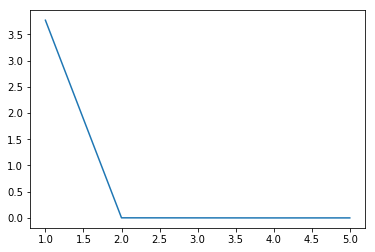

In [69]:
# Plot errors
plt.plot(np.arange(1,num_components+1,1), errors)

# Using NMF on newsgroups dataset

In [11]:
# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples]
print("done in %0.3fs." % (time() - t0))

Loading dataset...
done in 2.028s.


In [9]:
from pprint import pprint
pprint(list(dataset.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [3]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

Extracting tf-idf features for NMF...
done in 0.533s.


In [5]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

Extracting tf features for LDA...
done in 0.447s.


In [12]:
# Fit the NMF model
print("Fitting the NMF model with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

Fitting the NMF model with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.154s.


In [25]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [35]:
nmf.components_[0][nmf.components_[0].argsort()[:-n_top_words - 1:-1]]

array([ 0.72092607,  0.66229987,  0.65681924,  0.4751504 ,  0.47399834,
        0.44494586,  0.3725007 ,  0.36745565,  0.35805998,  0.35436103,
        0.34673472,  0.34011937,  0.32678916,  0.32180633,  0.29817074,
        0.28126363,  0.27821885,  0.27030362,  0.2638888 ,  0.25767412])

In [44]:
import numpy as np
np.count_nonzero(nmf.components_[0])

928

In [13]:
print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model:
Topic #0:
people like don know time good way make ve say really right did new want going got years car ll
Topic #1:
windows dos using window os application ms running drivers screen software program manager motif mode work machine unix help code
Topic #2:
god jesus bible faith christian christ christians sin heaven believe lord life mary church love belief human religion atheism people
Topic #3:
thanks know advance mail hi interested email info anybody send looking like list appreciated help information address new reply post
Topic #4:
year ll team old 000 insurance toronto years season good left lot win 500 computer better defense hit looks hear
Topic #5:
edu soon send internet university mit cc information hope blood home mail article need cs email term contact 93 mac
Topic #6:
ftp program pc pub available files site version anonymous graphics mac mail switch hi amiga package university directory server mode
Topic #7:
game games team play win season players nhl 

# Using LDA
---

In [36]:
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 2.550s.


In [37]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0:
rules nature memory list free data probably copies edu change pub graphics allowed break mail god 128 3d send ray
Topic #1:
armenians armenian turkish 000 went dead azerbaijan people mamma children armenia city killed said home weapons apartment crowd population building
Topic #2:
year defense think better want lot real really addition graphics hit pretty good edu following people years features like driving
Topic #3:
engine power water hot cold gas drive runs air oil better driver wanted sale format cs software problem make tape
Topic #4:
display monitor correct ground value knows yes try need comes 16 board long really possible house putting appreciated live response
Topic #5:
israel scsi attacks israeli win jews conference men policy soldiers true bit state papers people allow problem regular accept able
Topic #6:
greek players team play hockey nhl player game bob teams playing north new early pittsburgh world games canada best said
Topic #7:
bike car